# Ideal low pass filter

$H(j \omega) = \begin{cases} e^{-j \omega t_0} & \text{ , }  |\omega| \leq \omega_c \\ 0 & \text{ , } |\omega| > \omega_c \end{cases}$

$\omega_c = 2 \pi f_c$ ,which is cutoff frequency

Take the inverse Fourier Transform of $H(j \omega)$ to obtain $h(t)$

<img src="https://latex.codecogs.com/gif.latex?h(t) = \frac{1}{2 \pi} \int^{w_c}_{-w_c}e^{-j\omega t_0} \cdot e^{j\omega t} d \omega">
<img src="https://latex.codecogs.com/gif.latex?= \frac{1}{2\pi} \frac{e^{j\omega (t-t_0)}}{j(t-t_0)} |^{w_c}_{-w_c}">
<img src="https://latex.codecogs.com/gif.latex?=\frac{sin(\omega_{c}(t-t_0))}{\pi(t-t_0)}">

Definition of sinc function: $sinc(wt) = \frac{sin(\pi \omega t)}{\pi \omega t}$

<img src="https://latex.codecogs.com/gif.latex?h(t) = \frac{\omega_c}{\pi}sinc(\frac{\omega_c}{\pi}(t-t_0))">

Take the inverse DTFT of $H(j \omega)$ to obtain $h[n]$

<img src="https://latex.codecogs.com/gif.latex?h[n] = \frac{1}{2\pi} \int^{\omega_c}_{-\omega_c} 1 \cdot e^{j\omega n} d\omega ">

<img src="https://latex.codecogs.com/gif.latex?= \frac{1}{2\pi} \cdot \frac{1}{jn} e^{j \omega n}|^{\omega_c}_{-\omega_c}">

<img src="https://latex.codecogs.com/gif.latex?= \frac{1}{2\pi} (\frac{e^{j \omega_c n}}{jn} - \frac{e^{-j \omega_c n}}{jn})">

<img src="https://latex.codecogs.com/gif.latex?= \frac{sin(\omega_c n) }{\pi n }">

When $n = 0$, derive it by L'Hôpital's rule

<img src="https://latex.codecogs.com/gif.latex?h[0] = \lim_{n\rightarrow 0} \frac{\frac{\mathrm{d} }{\mathrm{d} n} sin(\omega_c n)}{\frac{\mathrm{d} }{\mathrm{d} n} (\pi n)} = \lim_{n\rightarrow 0} \frac{cos(\omega_c n) \cdot \omega_c}{\pi } = \frac{\omega_c}{\pi}">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
filter_size = 15
filter_half = int( filter_size / 2 )

let $\omega_c = \frac{\pi}{2} \cong 1.57$

In [3]:
wc = np.pi / 2 

In [4]:
na = np.arange(-filter_half, filter_half + 1) 
h = np.zeros(filter_size)                     

In [5]:
for n in na:
    if n == 0: 
        h[n + filter_half] = wc / np.pi
    else:
        h[n + filter_half] = np.sin(wc * n) / (np.pi * n)

Text(0, 0.5, 'h[n]')

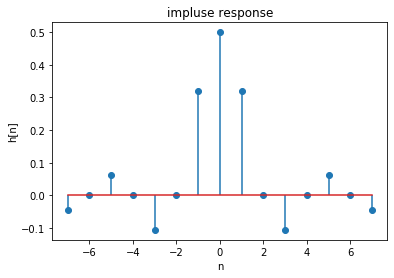

In [8]:
plt.stem(na, h, use_line_collection=True)
plt.title('impluse response')
plt.xlabel('n')
plt.ylabel('h[n]')

Text(0, 0.5, 'Magnitude')

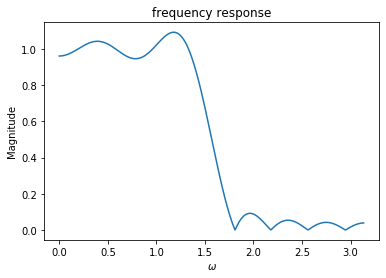

In [9]:
w, H = signal.freqz(h)
mag = abs(H)

plt.plot( w, mag )
plt.title('frequency response')
plt.xlabel(r'$\omega$')
plt.ylabel('Magnitude')